In [137]:
#import all libraries
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import *


In [126]:
#get working directory
import os
os.getcwd()

'C:\\Users\\Piyusha'

In [127]:
#read the data
X=pd.read_excel(r"Downloads\trial.xlsx")
X

,TIMESTAMP,LONG_DIST,REL_SPEED,NEW_TRACK,LAT_DIST
0,1.534797e+12,11.5625,0.00000,0.0,-1.1875
1,1.534797e+12,13.6250,-0.09375,0.0,-2.5000
2,1.534797e+12,8.1250,-0.03125,0.0,1.8750
3,1.534797e+12,13.8125,-0.09375,0.0,-0.1250
4,1.534797e+12,8.3125,-0.03125,0.0,0.3125
5,1.534797e+12,16.6875,0.00000,0.0,-4.4375
6,NaN,NaN,NaN,NaN,NaN
7,1.534797e+12,11.5625,0.00000,0.0,-1.1875
8,1.534797e+12,13.6250,-0.09375,0.0,-2.5000
9,1.534797e+12,8.1250,-0.03125,0.0,1.8750


In [128]:
#dropped NAs and reset index
X1=X.dropna()
X2= X1.reset_index(drop=True)
X2

,TIMESTAMP,LONG_DIST,REL_SPEED,NEW_TRACK,LAT_DIST
0,1.534797e+12,11.5625,0.00000,0.0,-1.1875
1,1.534797e+12,13.6250,-0.09375,0.0,-2.5000
2,1.534797e+12,8.1250,-0.03125,0.0,1.8750
3,1.534797e+12,13.8125,-0.09375,0.0,-0.1250
4,1.534797e+12,8.3125,-0.03125,0.0,0.3125
5,1.534797e+12,16.6875,0.00000,0.0,-4.4375
6,1.534797e+12,11.5625,0.00000,0.0,-1.1875
7,1.534797e+12,13.6250,-0.09375,0.0,-2.5000
8,1.534797e+12,8.1250,-0.03125,0.0,1.8750
9,1.534797e+12,13.8125,-0.09375,0.0,-0.1250


In [129]:
#Extracting timestamp column for clustering 
X3= X2.TIMESTAMP
X3

0        1.534797e+12
1        1.534797e+12
2        1.534797e+12
3        1.534797e+12
4        1.534797e+12
5        1.534797e+12
6        1.534797e+12
7        1.534797e+12
8        1.534797e+12
9        1.534797e+12
10       1.534797e+12
11       1.534797e+12
12       1.534797e+12
13       1.534797e+12
14       1.534797e+12
15       1.534797e+12
16       1.534797e+12
17       1.534797e+12
18       1.534797e+12
19       1.534797e+12
20       1.534797e+12
21       1.534797e+12
22       1.534797e+12
23       1.534797e+12
24       1.534797e+12
25       1.534797e+12
26       1.534797e+12
27       1.534797e+12
28       1.534797e+12
29       1.534797e+12
             ...     
45768    1.534798e+12
45769    1.534798e+12
45770    1.534798e+12
45771    1.534798e+12
45772    1.534798e+12
45773    1.534798e+12
45774    1.534798e+12
45775    1.534798e+12
45776    1.534798e+12
45777    1.534798e+12
45778    1.534798e+12
45779    1.534798e+12
45780    1.534798e+12
45781    1.534798e+12
45782    1

In [138]:
#Checking the length of extracted tiestamd data in X3
len(X3)

45798

In [131]:
#reshaping the sequence into 2D array because of the syntax requirements
X4=np.reshape(X3, (-1, 2))
X4
X5= X4[:,0]


C:\Users\Piyusha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [142]:
#Estimating bandwidth
#note: this bandwidth is calculated considering all data ppoints as centroids atleast once and then narrowed
#down to the resultant band
bandwidth = estimate_bandwidth(X4,  n_jobs=5)
bandwidth

81590.14914204707

In [143]:
#fitting the data into clustering model based on the calculated bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X4)



MeanShift(bandwidth=81590.14914204707, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [144]:
#Finding out Cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_
cluster_centers


array([[1.53479735e+12, 1.53479735e+12],
       [1.53479757e+12, 1.53479757e+12],
       [1.53479766e+12, 1.53479766e+12]])

In [145]:
#Getting number of clusters
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 3


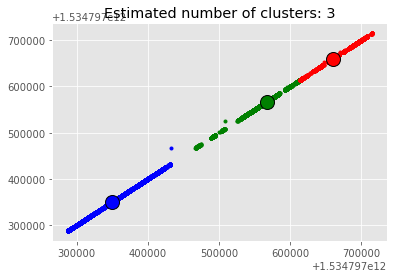

In [146]:
#Plot the results
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X4[my_members, 0], X4[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1],
             'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()